In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import sys
sys.path.append("../../..")
from utils import utils, postprocessing_utils as post
from utils.plotting_utils import plots

In [51]:
def make_plot(task, short_model_name, metric, fit_reg=False, exclude_reg=[]):
    params = {
        "results_dir": "../../../results/",
        "experiment": "acl",
        "short_model_name": short_model_name,
        "task": task,
        "metric": metric
    }

    M = post.Metrics(**params)
    df = M.within_score()
    stats_path = "../../../data_exploration/acl/tables/basic_stats_{}_{}.xlsx".format(task, short_model_name)
    df = utils.merge_tables(df, pd.read_excel(stats_path), how="left", cols_table2=["train_examples"])
    df.loc[:, "Within-Score"] *= 100
    df = df.rename(columns={"train_examples": "Train-Examples"})

    plots.scatter(x="Train-Examples",
                  y="Within-Score",
                  data=df,
                  log_x=True,
                  xaxis_title="Training Examples (log)",
                  yaxis_title="In-language Score",
                  title=(task + " " + short_model_name).upper(),
                  fit_reg=fit_reg,
                  exclude_reg=exclude_reg)
    
    print("Pearson r:", pearsonr(x=df["Train-Examples"], y=df["Within-Score"]))
    print("Pearson r (logx):", pearsonr(x=np.log(df["Train-Examples"]), y=df["Within-Score"]))

# PoS

In [45]:
task = "pos"
metric = "Accuracy"

Pearson r: (0.058230063548444955, 0.8243227207195879)
Pearson r (logx): (0.3625135149259737, 0.15271138248634122)


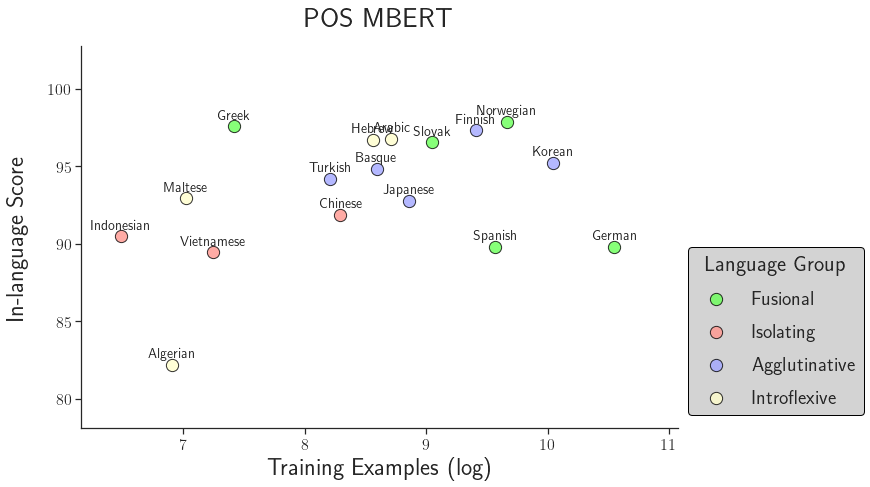

In [46]:
short_model_name = "mbert"
make_plot(task, short_model_name, metric)
plt.savefig("../../../results/acl/{}/plots/size_vs_score_{}.pdf".format(short_model_name, task), dpi=400, bbox_inches="tight")

Pearson r: (0.06408675039353673, 0.8069519720605324)
Pearson r (logx): (0.37243394798110224, 0.14096817476328377)


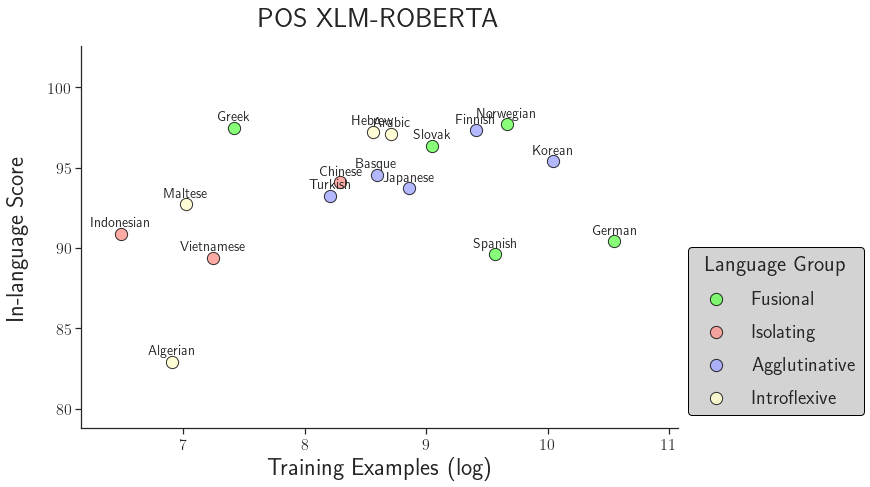

In [47]:
short_model_name = "xlm-roberta"
make_plot(task, short_model_name, metric)
plt.savefig("../../../results/acl/{}/plots/size_vs_score_{}.pdf".format(short_model_name, task), dpi=400, bbox_inches="tight")

# Sentiment

In [48]:
task = "sentiment"
metric = "Macro_F1"

Pearson r: (0.3194970715697161, 0.1824083566014693)
Pearson r (logx): (0.5053349773800262, 0.027311456298009254)


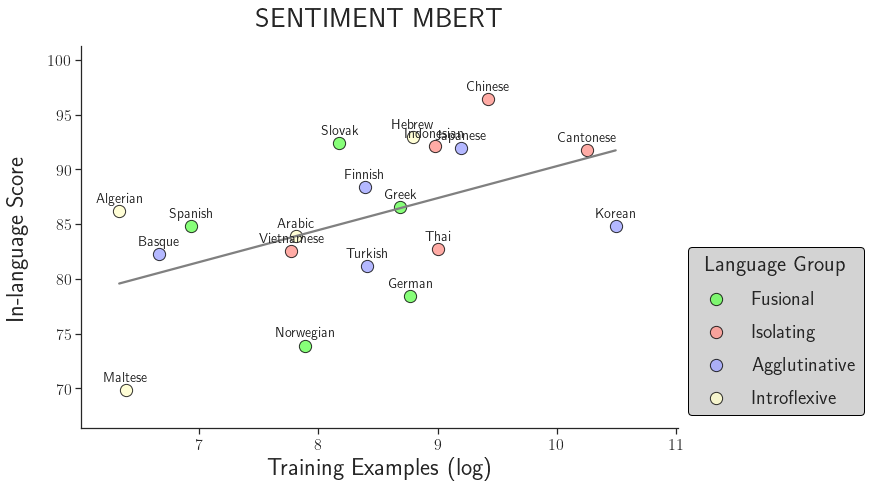

In [49]:
short_model_name = "mbert"
make_plot(task, short_model_name, metric, fit_reg=True)
plt.savefig("../../../results/acl/{}/plots/size_vs_score_{}.pdf".format(short_model_name, task), dpi=400, bbox_inches="tight")

Pearson r: (0.2928614676173847, 0.22368388789675578)
Pearson r (logx): (0.5809288533259083, 0.00909932634280976)


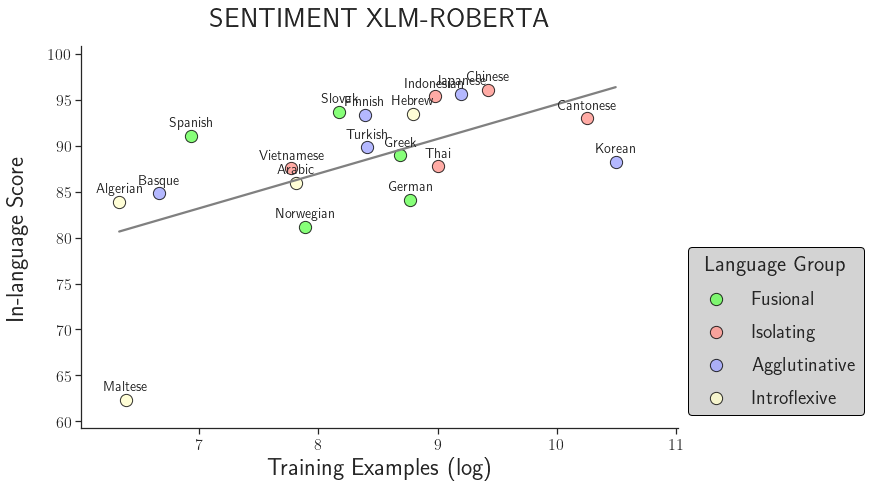

In [53]:
short_model_name = "xlm-roberta"
make_plot(task, short_model_name, metric, fit_reg=True)
plt.savefig("../../../results/acl/{}/plots/size_vs_score_{}.pdf".format(short_model_name, task), dpi=400, bbox_inches="tight")